In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


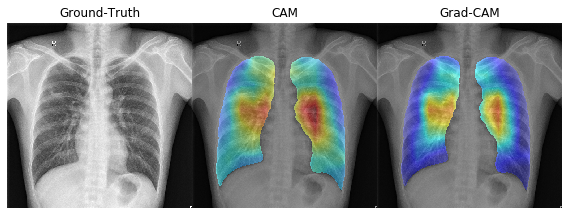

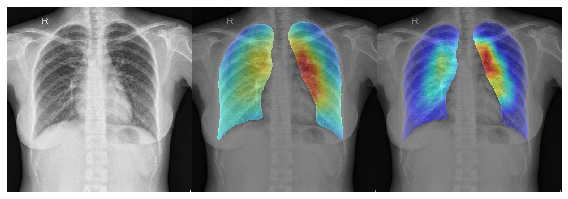

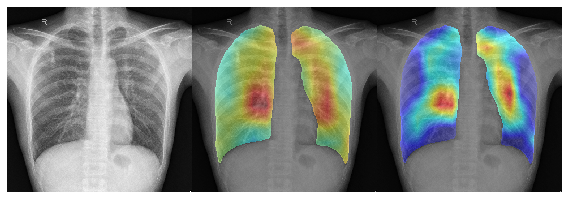

In [22]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array
import cv2
import os
import numpy as np

IMG_SIZE = 512

os.chdir('/content/drive/My Drive/GitHub Repositories')
baseDir = './Visual Explaination from Deep Neural Networks/dataset'

oriDir = os.path.join(baseDir, 'samples')
camDir = os.path.join(baseDir, 'CAM Heatmaps')
gradcamDir = os.path.join(baseDir, 'Grad-CAM Heatmaps')

images = sorted(os.listdir(camDir))
title=False
for imgname in images:
    img = load_img(os.path.join(oriDir, imgname), color_mode='rgb', target_size=(IMG_SIZE, IMG_SIZE))
    img = img_to_array(img)/255.0
    img = img.reshape(-1, img.shape[0], img.shape[1], 3)
      
    cam = img_to_array(load_img(os.path.join(camDir, imgname), color_mode='rgb', target_size=(IMG_SIZE, IMG_SIZE)))/255.0
    cam = cam.reshape(-1, cam.shape[0], cam.shape[1], 3)

    gradcam =  img_to_array(load_img(os.path.join(gradcamDir, imgname), color_mode='rgb', target_size=(IMG_SIZE, IMG_SIZE)))/255.0
    gradcam = gradcam.reshape(-1, gradcam.shape[0], gradcam.shape[1], 3)
      
    result = np.concatenate([img, cam, gradcam])

    titles = ['Ground-Truth', 'CAM', 'Grad-CAM',]
    fig=plt.figure(1, figsize=(8,10))
    for i in range(3):
      plt.subplot(1, 3, i+1)
      plt.imshow(result[i, :, :, :])
      plt.axis('off')
      if title==False:
        plt.gca().set_title(titles[i])
      plt.axis('off')
    title=True
    
    fig.savefig(os.path.join(baseDir, imgname), bbox_inches='tight')
    plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()
    plt.close()






In [13]:
cam.dtype

dtype('float32')